# Preprocessing

## Installs

In [1]:
# %pip install numpy
# %pip install pandas
# %pip install matplotlib
# %pip install seaborn

## Imports

In [2]:
import os
import sys
import pathlib
print(pathlib.Path().resolve())
from glob import glob

import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns



/home/bot/thesis/conditional_segmentation_thesis


## Create DataFrame

In [3]:
#Get files containing logs
pattern = './Experiments/**/running_logs/*' #Gets all the log files
files = glob(pattern, recursive=True)
[print(i) for i in files if not None]


./Experiments/exp_3_segBoth_2_sample/CBCTUnetSeg/running_logs/segModeBoth_2sample_CV6_train_log_6.txt
./Experiments/exp_3_segBoth_2_sample/CBCTUnetSeg/running_logs/segModeBoth_2sample_CV4_train_log_4.txt
./Experiments/exp_3_segBoth_2_sample/CBCTUnetSeg/running_logs/segModeBoth_2sample_CV0_train_log_0.txt
./Experiments/exp_3_segBoth_2_sample/CBCTUnetSeg/running_logs/segModeBoth_2sample_CV3_train_log_3.txt
./Experiments/exp_3_segBoth_2_sample/CBCTUnetSeg/running_logs/segModeBoth_2sample_CV1_train_log_1.txt
./Experiments/exp_3_segBoth_2_sample/CBCTUnetSeg/running_logs/segModeBoth_2sample_CV2_train_log_2.txt
./Experiments/exp_3_segBoth_2_sample/CBCTUnetSeg/running_logs/segModeBoth_2sample_CV7_train_log_7.txt
./Experiments/exp_3_segBoth_2_sample/CBCTUnetSeg/running_logs/segModeBoth_2sample_CV5_train_log_5.txt
./Experiments/exp_2_CS_and_CSRev/ConditionalSeg/running_logs/CondisegCBCT_cv4_nc16_train_log_4.txt
./Experiments/exp_2_CS_and_CSRev/ConditionalSeg/running_logs/CondisegCBCT_cv2_nc16_tr

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

In [4]:
#Get First File
df = pd.read_csv(files[0])

#Join rest of files without header.
df = pd.concat([df] + [pd.read_csv(i) for i in files[1:]], ignore_index = True, axis = 0)
df.head(500) #Quick check

,project,exp_name,fold,train_val_test,epoch,value,value_type
0,CBCTUnetSeg,segModeBoth_2sample_CV6,6,'train',1.0,2.897165,'loss'
1,CBCTUnetSeg,segModeBoth_2sample_CV6,6,'val',1.0,0.028043,'dice_mean'
2,CBCTUnetSeg,segModeBoth_2sample_CV6,6,'val',1.0,0.017969,'dice_std'
3,CBCTUnetSeg,segModeBoth_2sample_CV6,6,'train',2.0,2.84397,'loss'
4,CBCTUnetSeg,segModeBoth_2sample_CV6,6,'val',2.0,0.109517,'dice_mean'
...,...,...,...,...,...,...,...
495,CBCTUnetSeg,segModeBoth_2sample_CV6,6,'train',166.0,2.524223,'loss'
496,CBCTUnetSeg,segModeBoth_2sample_CV6,6,'val',166.0,0.291911,'dice_mean'
497,CBCTUnetSeg,segModeBoth_2sample_CV6,6,'val',166.0,0.320591,'dice_std'
498,CBCTUnetSeg,segModeBoth_2sample_CV6,6,'train',167.0,2.621474,'loss'


In [5]:
print(df.info())
print(df.describe())
print(df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3706196 entries, 0 to 3706195
Data columns (total 7 columns):
 #   Column          Dtype  
---  ------          -----  
 0   project         object 
 1   exp_name        object 
 2   fold            object 
 3   train_val_test  object 
 4   epoch           float64
 5   value           object 
 6   value_type      object 
dtypes: float64(1), object(6)
memory usage: 197.9+ MB
None
              epoch
count  3.706196e+06
mean   1.003332e+04
std    5.758933e+03
min    6.131642e-01
25%    5.056000e+03
50%    1.003800e+04
75%    1.501900e+04
max    2.000000e+04
       project                 exp_name fold train_val_test  epoch     value  \
0  CBCTUnetSeg  segModeBoth_2sample_CV6    6        'train'    1.0  2.897165   
1  CBCTUnetSeg  segModeBoth_2sample_CV6    6          'val'    1.0  0.028043   
2  CBCTUnetSeg  segModeBoth_2sample_CV6    6          'val'    1.0  0.017969   
3  CBCTUnetSeg  segModeBoth_2sample_CV6    6        'train'    2.0  

In [6]:
list(df.exp_name.unique())

['segModeBoth_2sample_CV6',
 'segModeBoth_2sample_CV4',
 'segModeBoth_2sample_CV0',
 'segModeBoth_2sample_CV3',
 'segModeBoth_2sample_CV1',
 'segModeBoth_2sample_CV2',
 'segModeBoth_2sample_CV7',
 'segModeBoth_2sample_CV5',
 'CondisegCBCT_cv4_nc16',
 'CondisegCBCT_cv2_nc16',
 '0',
 'CondisegCBCT_cv0_nc16',
 'CondisegCBCT_cv7_nc16',
 'CondisegCBCT_cv1_nc16',
 'CondisegCBCT_cv6_nc16',
 'CondisegCBCT_cv3_nc16',
 'CondisegReversed_cv0_nc16',
 'CondisegReversed_cv2_nc16',
 'CondisegReversed_cv6_nc16',
 'CondisegReversed_cv7_nc16',
 'CondisegReversed_cv3_nc16',
 'CondisegReversed_cv5_nc16',
 'CondisegReversed_cv1_nc16',
 'CBCT_Infer_CondisegReversed_cv1_nc16',
 'CBCT_Infer_CondisegReversed_cv4_nc16',
 'CBCT_Infer_CondisegReversed_cv5_nc16',
 'CBCT_Infer_CondisegReversed_cv7_nc16',
 'CBCT_Infer_CondisegReversed_cv2_nc16',
 'CBCT_Infer_CondisegReversed_cv3_nc16',
 'CBCT_Infer_CondisegReversed_cv0_nc16',
 'CBCT_Infer_CondisegReversed_cv6_nc16',
 'inoutsegModeCTCV4',
 'inoutsegModeCTCV7',
 'inou

In [7]:
df.drop(df[df['exp_name'] =='0'].index, inplace=True)

In [8]:
#One was a NaN which was obviously a condisegreversed by exp_name. Update to the correct project
df[df['project'].isna()] = 'ConditionalSegReversed'

In [9]:
df.drop(df[df['exp_name'] == 'ConditionalSegReversed'].index, inplace=True)

In [10]:
df[df['project'] == 'ConditionalSegReversed']


,project,exp_name,fold,train_val_test,epoch,value,value_type
891834,ConditionalSegReversed,CondisegReversed_cv0_nc16,0,'val',1880.0,0.694682,'dice_mean'
891835,ConditionalSegReversed,CondisegReversed_cv0_nc16,0,'val',1880.0,0.165893,'dice_std'
891836,ConditionalSegReversed,CondisegReversed_cv0_nc16,0,'train',1881.0,0.09328,'loss'
891837,ConditionalSegReversed,CondisegReversed_cv0_nc16,0,'val',1881.0,0.684008,'dice_mean'
891838,ConditionalSegReversed,CondisegReversed_cv0_nc16,0,'val',1881.0,0.157302,'dice_std'
...,...,...,...,...,...,...,...
1306191,ConditionalSegReversed,CondisegReversed_cv1_nc16,1,'val',19999.0,0.777189,'dice_mean'
1306192,ConditionalSegReversed,CondisegReversed_cv1_nc16,1,'val',19999.0,0.145258,'dice_std'
1306193,ConditionalSegReversed,CondisegReversed_cv1_nc16,1,'train',20000.0,0.043498,'loss'
1306194,ConditionalSegReversed,CondisegReversed_cv1_nc16,1,'val',20000.0,0.773943,'dice_mean'


In [11]:
#Convert Fields to correct type
df['value'] = df['value'].astype(float)
df['fold'] = df['fold'].astype(int)
df['project'] = df['project'].astype(str)
df['exp_name'] = df['exp_name'].astype(str)
df['epoch'] = df['epoch'].astype(int)
df['train_val_test'].str.replace("'", "")
df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 3706194 entries, 0 to 3706195
Data columns (total 7 columns):
 #   Column          Dtype  
---  ------          -----  
 0   project         object 
 1   exp_name        object 
 2   fold            int64  
 3   train_val_test  object 
 4   epoch           int64  
 5   value           float64
 6   value_type      object 
dtypes: float64(1), int64(2), object(4)
memory usage: 226.2+ MB


## Experiment Setup

### For Curves

In [12]:
#df[df['exp_name'].startswith'segModeBoth'].head()

In [13]:
# #change segModeBoth_2sample to 2sample_segModeBoth
# df[df['exp_name'].startswith('segModeBoth_2sample')]['exp_name'] = '2sample_segModeBoth'
# #df[df['exp_name'] == 'segModeBoth_2sample'] = '2sample_segModeBoth'
# df[df['exp_name'] == '2sample_segModeBoth'].head()

df

In [14]:
projects = df.project.unique().tolist() #Get unique projects
projects

['CBCTUnetSeg', 'ConditionalSeg', 'ConditionalSegReversed']

In [15]:
experiments = df.exp_name.unique().tolist()
print(df.exp_name.unique().tolist().sort()) #get unique experiments
experiments.sort() #sort alphanumerically

None


In [16]:
print(experiments)

['CBCT_Infer_CondisegReversed_cv0_nc16', 'CBCT_Infer_CondisegReversed_cv1_nc16', 'CBCT_Infer_CondisegReversed_cv2_nc16', 'CBCT_Infer_CondisegReversed_cv3_nc16', 'CBCT_Infer_CondisegReversed_cv4_nc16', 'CBCT_Infer_CondisegReversed_cv5_nc16', 'CBCT_Infer_CondisegReversed_cv6_nc16', 'CBCT_Infer_CondisegReversed_cv7_nc16', 'CondisegCBCT_cv0_nc16', 'CondisegCBCT_cv1_nc16', 'CondisegCBCT_cv2_nc16', 'CondisegCBCT_cv3_nc16', 'CondisegCBCT_cv4_nc16', 'CondisegCBCT_cv6_nc16', 'CondisegCBCT_cv7_nc16', 'CondisegReversed_cv0_nc16', 'CondisegReversed_cv1_nc16', 'CondisegReversed_cv2_nc16', 'CondisegReversed_cv3_nc16', 'CondisegReversed_cv5_nc16', 'CondisegReversed_cv6_nc16', 'CondisegReversed_cv7_nc16', 'inoutsegModeCTCV0', 'inoutsegModeCTCV1', 'inoutsegModeCTCV2', 'inoutsegModeCTCV3', 'inoutsegModeCTCV4', 'inoutsegModeCTCV5', 'inoutsegModeCTCV6', 'inoutsegModeCTCV7', 'segModeBothCV0', 'segModeBothCV1', 'segModeBothCV2', 'segModeBothCV3', 'segModeBothCV4', 'segModeBothCV5', 'segModeBothCV6', 'segMod

In [17]:
experiments = list(df.exp_name.unique()) #get unique experiments
print(experiments.sort())
experiments
exp_types = ['CondisegCBCT', 'CondisegReversed', 'segModeBoth', 'segModeCBCT', 'segModeCT', 'segModeBoth_2sample', 'inoutsegModeCT', 'CBCT_Infer_CondisegReversed']

None


In [18]:
exp_type = exp_types[0]
df[df['exp_name'].str.startswith(exp_type)] 

,project,exp_name,fold,train_val_test,epoch,value,value_type
480000,ConditionalSeg,CondisegCBCT_cv4_nc16,4,'train',1,0.886185,'loss'
480001,ConditionalSeg,CondisegCBCT_cv4_nc16,4,'val',1,0.080423,'dice_mean'
480002,ConditionalSeg,CondisegCBCT_cv4_nc16,4,'val',1,0.070590,'dice_std'
480003,ConditionalSeg,CondisegCBCT_cv4_nc16,4,'train',2,0.894790,'loss'
480004,ConditionalSeg,CondisegCBCT_cv4_nc16,4,'val',2,0.014435,'dice_mean'
...,...,...,...,...,...,...,...
891828,ConditionalSeg,CondisegCBCT_cv3_nc16,3,'val',19999,0.750035,'dice_mean'
891829,ConditionalSeg,CondisegCBCT_cv3_nc16,3,'val',19999,0.187823,'dice_std'
891830,ConditionalSeg,CondisegCBCT_cv3_nc16,3,'train',20000,0.051964,'loss'
891831,ConditionalSeg,CondisegCBCT_cv3_nc16,3,'val',20000,0.749346,'dice_mean'


In [19]:
#Creata a dictionary to map experiment name to a friendly name to be displayed on the chart for the corresponding experiment.
exp_name_title_mapping = {'CondisegCBCT': "05 - Conditional Segmentation Algorithm: (INFERENCE: CBCT Seg) [Two Stage Sampling]",
                          'CondisegReversed': "06 - Conditional Segmentation (Reversed): (INFERENCE: CT Seg) [Two Stage Sampling]",
                          'segModeBoth': "04 - CBCT and CT Segmentation: (INFERENCE: [CBCT,CT] Seg)",
                          'segModeCBCT': "01 - CBCT Segmentation: (TRAIN: CBCT; INFERENCE: CBCT Seg)",
                          'segModeCT': "02 - CBCT Segmentation: (TRAIN: CT; INFERENCE: CBCT Seg)",
                          'segModeBoth_2sample': "x05 - CBCT and CT Segmentation: (INFERENCE: [CBCT,CT] Seg) [Two Stage Sampling]",
                          "inoutsegModeCT": "03 - CT Segmentation (INPUT: CT; OUT: CT Seg)",
                          "CBCT_Infer_CondisegReversed": "07 - Conditional Segmentation (Reversed): (INFERENCE: CBCT Seg) [Two Stage Sampling]"}



#Note: CondisegReversed =  INPUT: [CT, CBCT, CT Seg] OUT: Differs by experiment

### For Visualization

In [20]:
#Get files containing running logs.
pattern = './Experiments/**/running_logs/*' #Gets all the log files
files = glob(pattern, recursive=True)
[print(i) for i in files if not None]

./Experiments/exp_3_segBoth_2_sample/CBCTUnetSeg/running_logs/segModeBoth_2sample_CV6_train_log_6.txt
./Experiments/exp_3_segBoth_2_sample/CBCTUnetSeg/running_logs/segModeBoth_2sample_CV4_train_log_4.txt
./Experiments/exp_3_segBoth_2_sample/CBCTUnetSeg/running_logs/segModeBoth_2sample_CV0_train_log_0.txt
./Experiments/exp_3_segBoth_2_sample/CBCTUnetSeg/running_logs/segModeBoth_2sample_CV3_train_log_3.txt
./Experiments/exp_3_segBoth_2_sample/CBCTUnetSeg/running_logs/segModeBoth_2sample_CV1_train_log_1.txt
./Experiments/exp_3_segBoth_2_sample/CBCTUnetSeg/running_logs/segModeBoth_2sample_CV2_train_log_2.txt
./Experiments/exp_3_segBoth_2_sample/CBCTUnetSeg/running_logs/segModeBoth_2sample_CV7_train_log_7.txt
./Experiments/exp_3_segBoth_2_sample/CBCTUnetSeg/running_logs/segModeBoth_2sample_CV5_train_log_5.txt
./Experiments/exp_2_CS_and_CSRev/ConditionalSeg/running_logs/CondisegCBCT_cv4_nc16_train_log_4.txt
./Experiments/exp_2_CS_and_CSRev/ConditionalSeg/running_logs/CondisegCBCT_cv2_nc16_tr

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

## Plot Helpers

In [21]:
df.exp_name.unique()

array(['segModeBoth_2sample_CV6', 'segModeBoth_2sample_CV4',
       'segModeBoth_2sample_CV0', 'segModeBoth_2sample_CV3',
       'segModeBoth_2sample_CV1', 'segModeBoth_2sample_CV2',
       'segModeBoth_2sample_CV7', 'segModeBoth_2sample_CV5',
       'CondisegCBCT_cv4_nc16', 'CondisegCBCT_cv2_nc16',
       'CondisegCBCT_cv0_nc16', 'CondisegCBCT_cv7_nc16',
       'CondisegCBCT_cv1_nc16', 'CondisegCBCT_cv6_nc16',
       'CondisegCBCT_cv3_nc16', 'CondisegReversed_cv0_nc16',
       'CondisegReversed_cv2_nc16', 'CondisegReversed_cv6_nc16',
       'CondisegReversed_cv7_nc16', 'CondisegReversed_cv3_nc16',
       'CondisegReversed_cv5_nc16', 'CondisegReversed_cv1_nc16',
       'CBCT_Infer_CondisegReversed_cv1_nc16',
       'CBCT_Infer_CondisegReversed_cv4_nc16',
       'CBCT_Infer_CondisegReversed_cv5_nc16',
       'CBCT_Infer_CondisegReversed_cv7_nc16',
       'CBCT_Infer_CondisegReversed_cv2_nc16',
       'CBCT_Infer_CondisegReversed_cv3_nc16',
       'CBCT_Infer_CondisegReversed_cv0_nc16',


In [22]:
exp_types

['CondisegCBCT',
 'CondisegReversed',
 'segModeBoth',
 'segModeCBCT',
 'segModeCT',
 'segModeBoth_2sample',
 'inoutsegModeCT',
 'CBCT_Infer_CondisegReversed']

In [23]:
exp_grouping = {}
#Create a dictionary to map experiment name to a list of experiments that are part of the same group.
#Loop through all unique experiment names (one for each fold per experiment)
for exp_name in df.exp_name.unique().tolist():
    #Then loop through the exp_types which are unique exp_name prefixes. Map to the Grouping
    #print(f"exp_name: {exp_name}")
    for exp_type in exp_name_title_mapping.keys():
        #print(f'exp_type: {exp_type}')
        if exp_name.startswith('segModeBoth_2sample'):
            exp_grouping[exp_name] = exp_name_title_mapping['segModeBoth_2sample']
            break
        elif exp_name.startswith('segModeBoth'):
            exp_grouping[exp_name] = exp_name_title_mapping['segModeBoth']
            break
        if exp_name.startswith(exp_type):
            exp_grouping[exp_name] = exp_name_title_mapping[exp_type]
            break #break out of the loop since we found the exp_type

print(f'exp_grouping: {exp_grouping}')

df['experiment_group'] = df['exp_name'].map(exp_grouping)

exp_grouping: {'segModeBoth_2sample_CV6': 'x05 - CBCT and CT Segmentation: (INFERENCE: [CBCT,CT] Seg) [Two Stage Sampling]', 'segModeBoth_2sample_CV4': 'x05 - CBCT and CT Segmentation: (INFERENCE: [CBCT,CT] Seg) [Two Stage Sampling]', 'segModeBoth_2sample_CV0': 'x05 - CBCT and CT Segmentation: (INFERENCE: [CBCT,CT] Seg) [Two Stage Sampling]', 'segModeBoth_2sample_CV3': 'x05 - CBCT and CT Segmentation: (INFERENCE: [CBCT,CT] Seg) [Two Stage Sampling]', 'segModeBoth_2sample_CV1': 'x05 - CBCT and CT Segmentation: (INFERENCE: [CBCT,CT] Seg) [Two Stage Sampling]', 'segModeBoth_2sample_CV2': 'x05 - CBCT and CT Segmentation: (INFERENCE: [CBCT,CT] Seg) [Two Stage Sampling]', 'segModeBoth_2sample_CV7': 'x05 - CBCT and CT Segmentation: (INFERENCE: [CBCT,CT] Seg) [Two Stage Sampling]', 'segModeBoth_2sample_CV5': 'x05 - CBCT and CT Segmentation: (INFERENCE: [CBCT,CT] Seg) [Two Stage Sampling]', 'CondisegCBCT_cv4_nc16': '05 - Conditional Segmentation Algorithm: (INFERENCE: CBCT Seg) [Two Stage Sampl

In [24]:
#sorted(df['experiment_group'].unique().tolist(), lambda x[:2]: x)
# test = lambda x: x[:100]
# test(df['experiment_group'].unique().tolist()[1])

df['experiment_group'].unique().tolist()

['x05 - CBCT and CT Segmentation: (INFERENCE: [CBCT,CT] Seg) [Two Stage Sampling]',
 '05 - Conditional Segmentation Algorithm: (INFERENCE: CBCT Seg) [Two Stage Sampling]',
 '06 - Conditional Segmentation (Reversed): (INFERENCE: CT Seg) [Two Stage Sampling]',
 '07 - Conditional Segmentation (Reversed): (INFERENCE: CBCT Seg) [Two Stage Sampling]',
 '03 - CT Segmentation (INPUT: CT; OUT: CT Seg)',
 '01 - CBCT Segmentation: (TRAIN: CBCT; INFERENCE: CBCT Seg)',
 '04 - CBCT and CT Segmentation: (INFERENCE: [CBCT,CT] Seg)',
 '02 - CBCT Segmentation: (TRAIN: CT; INFERENCE: CBCT Seg)']

In [25]:
#drop experiment 05x
df.drop(df[df['exp_name'].str.startswith('segModeBoth_2sample')].index, inplace=True)

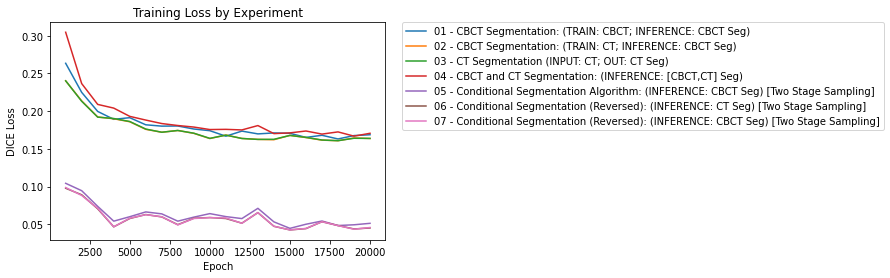

In [26]:
def plot_data_aggregate(exp_types, train_val_test, value_type, max_epochs, every_nth_epoch, title = None, y_label = 'Value'):
    
    
    df_local = df[df['epoch'] % every_nth_epoch == 0] #Only get data for every 1000 epochs
    #print(df_local.experiment_group.unique())
    if train_val_test == "'train'" and value_type == "'loss'":
        #print('hit')
        #print(df_local.describe())
        df_local = df_local.drop(df_local[df_local.experiment_group == '05 - CBCT and CT Segmentation: (INFERENCE: [CBCT,CT] Seg) [Two Stage Sampling]'].index)
        #print(df_local.describe())
    
    df_local = df_local[df_local['train_val_test'] == train_val_test] #only get training, validation, or test data
    df_local = df_local[df_local['value_type'] == value_type] #only get loss, dice_mean, or dice_std data
    df_local = df_local[df_local['epoch'] <= max_epochs] #Only get data for first 20k epochs
    #df_local = df_local.groupby(['experiment_group', 'epoch'], as_index=False).agg({"value": np.mean})
    #print(df_local[df_local['experiment_group'].str.startswith('02')])

    df_local.sort_values(by=['experiment_group', 'epoch'], inplace=True)
    plot = sns.lineplot(x='epoch', y='value', hue='experiment_group', data=df_local, markers=True, ci  = None)

    plot.set(title=title, xlabel='Epoch', ylabel=y_label) #Set title and labels
    # Put the legend out of the figure
    plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)        
    
    #If Validation DICE, set ylim appropriately as DICE is in range (0, 1)
    if train_val_test == "'val'" and value_type == "'dice_mean'":
        plt.ylim(0.2, 1)
        
    #plt.savefig(f'./Experiments/Plots/{title}.png', bbox_inches='tight')



#TEST
#plot_data_aggregate(exp_types,
plot_data_aggregate(exp_types, "'train'", "'loss'", 20000, 1000, title='Training Loss by Experiment', y_label = 'DICE Loss')


In [27]:
def plot_data_by_folds(exp_types, train_val_test, value_type, max_epochs, every_nth_epoch, y_label):
    print(f'exp_types: {exp_types}')
    for exp_type in exp_types:
        ##Only get data for the relevant experiment
        #Check if starts with segModeBoth_2sample
        if exp_type.startswith('segModeBoth_2sample'):
            df_experiment = df[df['exp_name'].str.startswith(exp_type)] #Only get data for this experiment
        #else check for more general exp_type
        elif exp_type.startswith('segModeBoth'):
            df_experiment = df[df['exp_name'].str.startswith(exp_type) & df['exp_name'].str.contains('2sample') == False]
            #Get all items in dataframe where exp_name starts with segModeBoth and does not contain '2sample'
            #df_experiment = df_experiment[df_experiment['exp_name'].str.contains('2sample') == False]
        else:
            df_experiment = df[df['exp_name'].str.startswith(exp_type)]
            
        df_experiment = df_experiment[df_experiment['epoch'] <= max_epochs] #Only get data for first 20k epochs
        df_experiment = df_experiment[df_experiment['epoch'] % every_nth_epoch == 0] #Only get data for every 1000 epochs
        df_experiment = df_experiment[df_experiment['train_val_test'] == train_val_test] #only get training, validation, or test data
        df_experiment = df_experiment[df_experiment['value_type'] == value_type][['epoch', 'value', 'fold']] #only get loss data
        plot = sns.lineplot(x='epoch', y='value', hue='fold', data=df_experiment, ci = None, legend = 'full')
        print(f'exp_type: {exp_type}') #for logging
        print(f'exp_name_title_mapping[exp_type]: {exp_name_title_mapping[exp_type]}') #for logging
        plot.set(title=f"{exp_name_title_mapping[exp_type]}", xlabel='Epoch', ylabel=y_label) #Set title and labels
        h,l = plot.get_legend_handles_labels()
        labels=["0", "1", "2", "3", "4", "5", "6", "7"]
        plot.legend(h, labels, title = "Fold", loc = "upper right", bbox_to_anchor=(1.17, 1)) 
        plt.ylim(0.0, 0.5)
        #If Validation DICE, set ylim appropriately as DICE is in range (0, 1)
        if train_val_test == "'val'" and value_type == "'dice_mean'":
            plt.ylim(0.2, 1)
        plt.show()
        plt.clf()

In [28]:
def plot_data_aggregate_by_fold(exp_types, train_val_test, value_type, max_epochs, every_nth_epoch):
    for exp_type in exp_types:
        ##Only get data for the relevant experiment
        #Check if starts with segModeBoth_2sample
        if exp_type.startswith('segModeBoth_2sample'):
            df_experiment = df[df['exp_name'].str.startswith(exp_type)] #Only get data for this experiment
        #else check for more general exp_type
        elif exp_type.startswith('segModeBoth'):
            df_experiment = df[df['exp_name'].str.startswith(exp_type) & df['exp_name'].str.contains('2sample') == False]
            #Get all items in dataframe where exp_name starts with segModeBoth and does not contain '2sample'
            #df_experiment = df_experiment[df_experiment['exp_name'].str.contains('2sample') == False]
        else:
            df_experiment = df[df['exp_name'].str.startswith(exp_type)]
            
        df_experiment = df_experiment[df_experiment['epoch'] <= max_epochs] #Only get data for first 20k epochs
        df_experiment = df_experiment[df_experiment['epoch'] % every_nth_epoch == 0] #Only get data for every 1000 epochs
        df_experiment = df_experiment[df_experiment['train_val_test'] == train_val_test] #only get training, validation, or test data
        df_experiment = df_experiment[df_experiment['value_type'] == value_type][['epoch', 'value', 'fold']] #only get loss data
        x = df_experiment.groupby(['epoch'], as_index=False).agg({"value": np.mean})
        plot = sns.lineplot(x='epoch', y='value', data=x)
        plot.set(title=f"{exp_name_title_mapping[exp_type]} by Epoch", xlabel='Epoch', ylabel='Loss') #Set title and labels
        
        plt.show()
        plt.clf()

#TEST
#plot_data_aggregate_by_fold(exp_types, "'val'", "'dice_mean'", 20000, 1000)


# Ploting

## Training Loss

todo: Put what was used for the training loss.

### Training Loss Convergence Analysis

#### By Fold

exp_types: ['CondisegCBCT', 'CondisegReversed', 'segModeBoth', 'segModeCBCT', 'segModeCT', 'segModeBoth_2sample', 'inoutsegModeCT', 'CBCT_Infer_CondisegReversed']
exp_type: CondisegCBCT
exp_name_title_mapping[exp_type]: 05 - Conditional Segmentation Algorithm: (INFERENCE: CBCT Seg) [Two Stage Sampling]


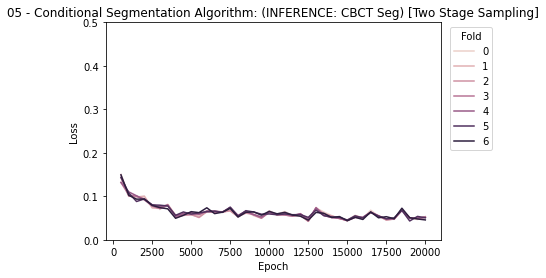

exp_type: CondisegReversed
exp_name_title_mapping[exp_type]: 06 - Conditional Segmentation (Reversed): (INFERENCE: CT Seg) [Two Stage Sampling]


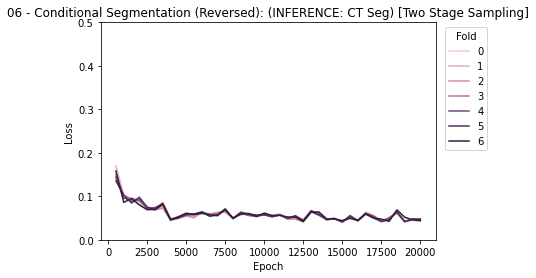

exp_type: segModeBoth
exp_name_title_mapping[exp_type]: 04 - CBCT and CT Segmentation: (INFERENCE: [CBCT,CT] Seg)


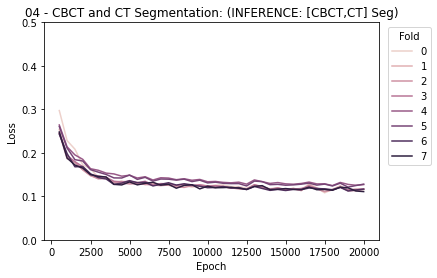

exp_type: segModeCBCT
exp_name_title_mapping[exp_type]: 01 - CBCT Segmentation: (TRAIN: CBCT; INFERENCE: CBCT Seg)


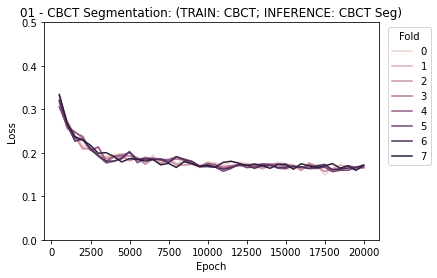

exp_type: segModeCT
exp_name_title_mapping[exp_type]: 02 - CBCT Segmentation: (TRAIN: CT; INFERENCE: CBCT Seg)


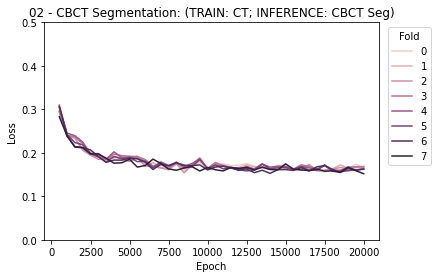

exp_type: segModeBoth_2sample
exp_name_title_mapping[exp_type]: x05 - CBCT and CT Segmentation: (INFERENCE: [CBCT,CT] Seg) [Two Stage Sampling]


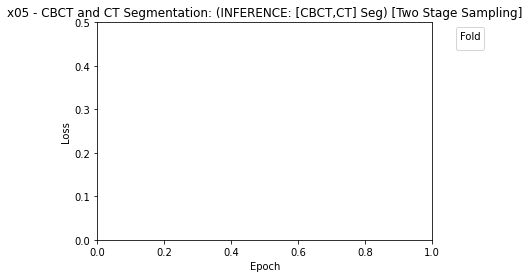

exp_type: inoutsegModeCT
exp_name_title_mapping[exp_type]: 03 - CT Segmentation (INPUT: CT; OUT: CT Seg)


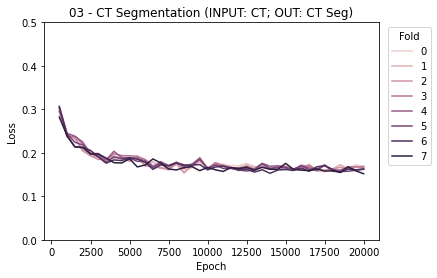

exp_type: CBCT_Infer_CondisegReversed
exp_name_title_mapping[exp_type]: 07 - Conditional Segmentation (Reversed): (INFERENCE: CBCT Seg) [Two Stage Sampling]


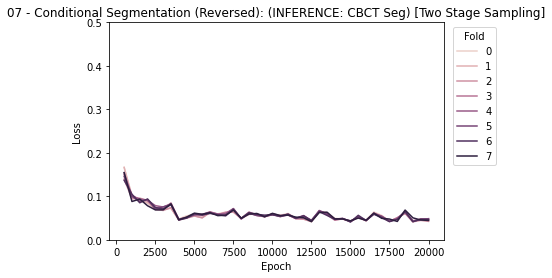

<Figure size 432x288 with 0 Axes>

In [29]:
#Plot an epoch vs Loss graph for the Conditional Segmentation Algorithm 
#Shaded areas are 95% Confidence Intervals of the Mean with 1000 bootstrap samples.
train_val_test = "'train'"
value_type = "'loss'"

plot_data_by_folds(exp_types, train_val_test, value_type, 20000, 500, 'Loss')


In [30]:
exp_name_title_mapping.keys()

dict_keys(['CondisegCBCT', 'CondisegReversed', 'segModeBoth', 'segModeCBCT', 'segModeCT', 'segModeBoth_2sample', 'inoutsegModeCT', 'CBCT_Infer_CondisegReversed'])

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Experiment 1:
Empty DataFrame
Columns: [epoch, value, fold]
Index: []
exp_type: segModeCT
exp_name_title_mapping[exp_type]: 02 - CBCT Segmentation: (TRAIN: CT; INFERENCE: CBCT Seg)


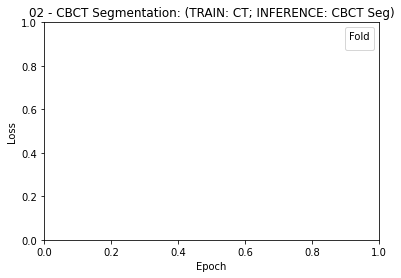

Experiment 2:
         epoch     value  fold
3589193   1000  0.286464     0
3592193   2000  0.239352     0
3595193   3000  0.213915     0
3598193   4000  0.202091     0
3601193   5000  0.199700     0
3604193   6000  0.181898     0
3607193   7000  0.184318     0
3610193   8000  0.176569     0
3613193   9000  0.175428     0
3616193  10000  0.178152     0
3619193  11000  0.176184     0
3622193  12000  0.180802     0
3625193  13000  0.174182     0
3628193  14000  0.171086     0
3631193  15000  0.162483     0
3634193  16000  0.170424     0
3637193  17000  0.178709     0
3640193  18000  0.173851     0
3643193  19000  0.165140     0
3646193  20000  0.168582     0
exp_type: segModeCT
exp_name_title_mapping[exp_type]: 02 - CBCT Segmentation: (TRAIN: CT; INFERENCE: CBCT Seg)


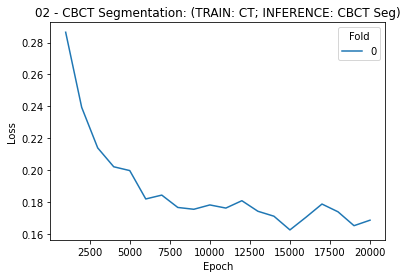

<Figure size 432x288 with 0 Axes>

In [31]:
every_nth_epoch = 1000
epoch = 20000
train_val_test = "'train'"
value_type = "'loss'"

df.exp_name.unique()
df_experiment1 = df[df['exp_name'] == 'segModeBoth_2sample_CV0']
df_experiment1 = df_experiment1[df_experiment1['epoch'] <= epoch] #Only get data for first 20k epochs
df_experiment1 = df_experiment1[df_experiment1['epoch'] % every_nth_epoch == 0] #Only get data for every 1000 epochs
df_experiment1 = df_experiment1[df_experiment1['train_val_test'] == train_val_test] #only get training, validation, or test data
df_experiment1 = df_experiment1[df_experiment1['value_type'] == value_type][['epoch', 'value', 'fold']] #only get loss data


df_experiment2 = df[df['exp_name'] == 'segModeBothCV0']
df_experiment2 = df_experiment2[df_experiment2['epoch'] <= epoch] #Only get data for first 20k epochs
df_experiment2 = df_experiment2[df_experiment2['epoch'] % every_nth_epoch == 0] #Only get data for every 1000 epochs
df_experiment2 = df_experiment2[df_experiment2['train_val_test'] == train_val_test] #only get training, validation, or test data
df_experiment2 = df_experiment2[df_experiment2['value_type'] == value_type][['epoch', 'value', 'fold']] #only get loss data

print("Experiment 1:")
print(df_experiment1)
plot = sns.lineplot(x='epoch', y='value', hue='fold', data=df_experiment1, ci = None)
print(f'exp_type: {exp_type}')
print(f'exp_name_title_mapping[exp_type]: {exp_name_title_mapping[exp_type]}')
plot.set(title=f"{exp_name_title_mapping[exp_type]}", xlabel='Epoch', ylabel='Loss') #Set title and labels
plot.legend(title='Fold')
plt.show()
plt.clf()

print("Experiment 2:")
print(df_experiment2)
plot = sns.lineplot(x='epoch', y='value', hue='fold', data=df_experiment2, ci = None)
print(f'exp_type: {exp_type}')
print(f'exp_name_title_mapping[exp_type]: {exp_name_title_mapping[exp_type]}')
plot.set(title=f"{exp_name_title_mapping[exp_type]}", xlabel='Epoch', ylabel='Loss') #Set title and labels
plot.legend(title='Fold')
plt.show()
plt.clf()


#### By Experiment

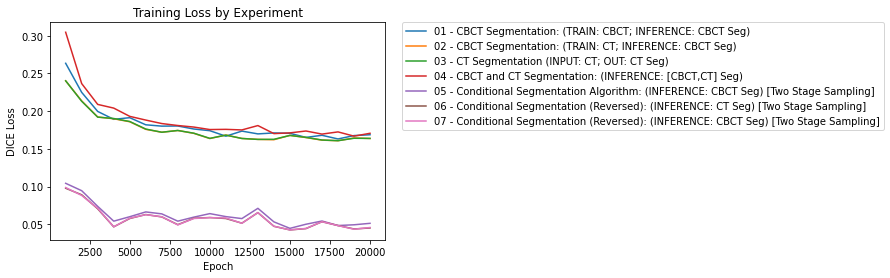

In [32]:
plot_data_aggregate(exp_types, "'train'", "'loss'", 20000, 1000, title='Training Loss by Experiment', y_label = 'DICE Loss')

## Validation Metric

DICE Metric is utilized which is defined as:
todo


### Validation Data Mean DICE Score

#### By Fold

exp_types: ['CondisegCBCT', 'CondisegReversed', 'segModeBoth', 'segModeCBCT', 'segModeCT', 'segModeBoth_2sample', 'inoutsegModeCT', 'CBCT_Infer_CondisegReversed']
exp_type: CondisegCBCT
exp_name_title_mapping[exp_type]: 05 - Conditional Segmentation Algorithm: (INFERENCE: CBCT Seg) [Two Stage Sampling]


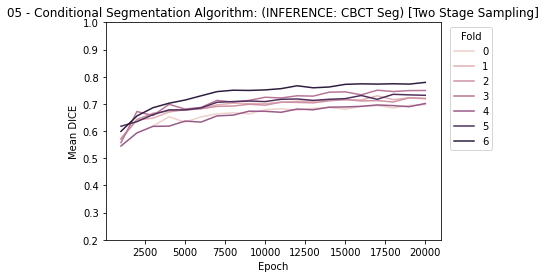

exp_type: CondisegReversed
exp_name_title_mapping[exp_type]: 06 - Conditional Segmentation (Reversed): (INFERENCE: CT Seg) [Two Stage Sampling]


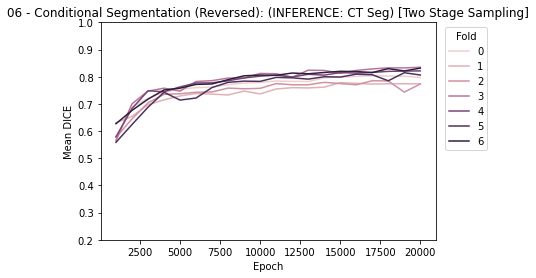

exp_type: segModeBoth
exp_name_title_mapping[exp_type]: 04 - CBCT and CT Segmentation: (INFERENCE: [CBCT,CT] Seg)


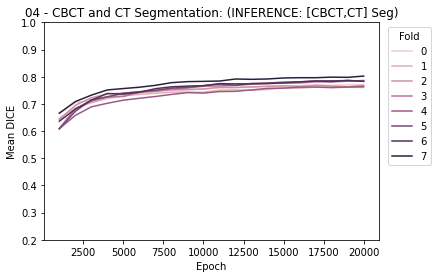

exp_type: segModeCBCT
exp_name_title_mapping[exp_type]: 01 - CBCT Segmentation: (TRAIN: CBCT; INFERENCE: CBCT Seg)


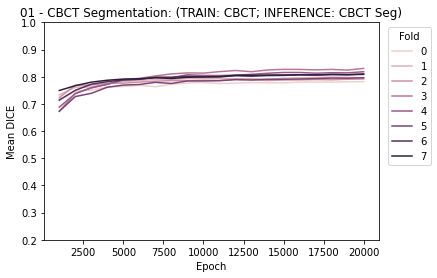

exp_type: segModeCT
exp_name_title_mapping[exp_type]: 02 - CBCT Segmentation: (TRAIN: CT; INFERENCE: CBCT Seg)


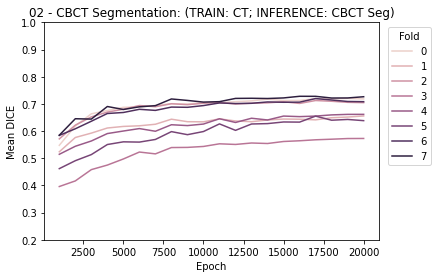

exp_type: segModeBoth_2sample
exp_name_title_mapping[exp_type]: x05 - CBCT and CT Segmentation: (INFERENCE: [CBCT,CT] Seg) [Two Stage Sampling]


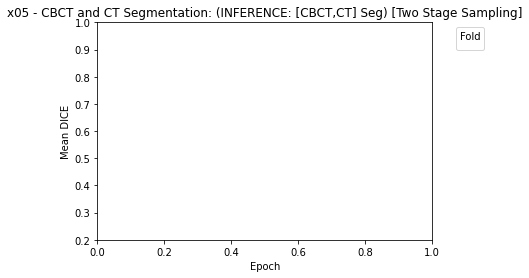

exp_type: inoutsegModeCT
exp_name_title_mapping[exp_type]: 03 - CT Segmentation (INPUT: CT; OUT: CT Seg)


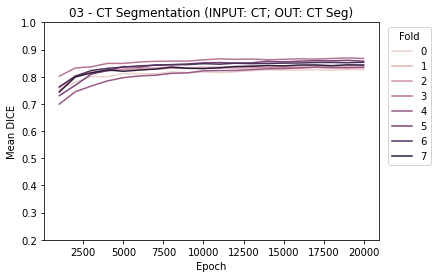

exp_type: CBCT_Infer_CondisegReversed
exp_name_title_mapping[exp_type]: 07 - Conditional Segmentation (Reversed): (INFERENCE: CBCT Seg) [Two Stage Sampling]


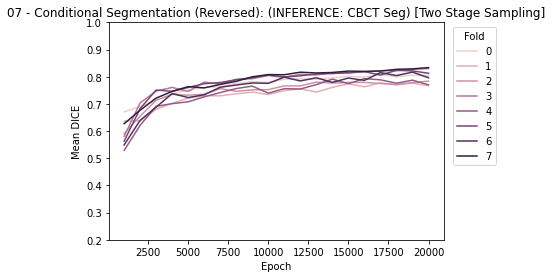

<Figure size 432x288 with 0 Axes>

In [33]:
train_val_test = "'val'"
value_type = "'dice_mean'"
plot_data_by_folds(exp_types, train_val_test, value_type, 20000, 1000, y_label = 'Mean DICE')
#todo fix ylabel

#### By Experiment

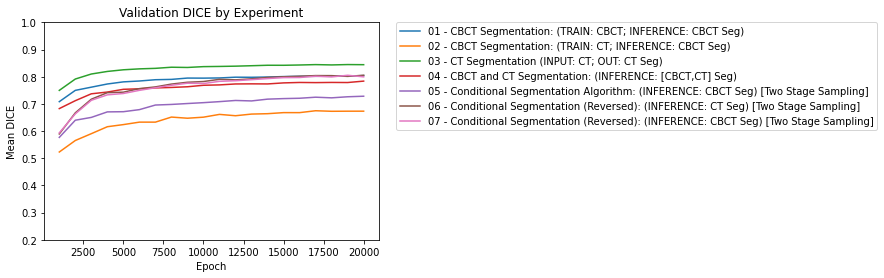

In [34]:
plot_data_aggregate(exp_types, "'val'", "'dice_mean'", 20000, 1000, title='Validation DICE by Experiment', y_label = 'Mean DICE')

#Notes from Yipeng
Would expect CT to be performing better as there is more information in CT images. Why is CT Lower?

### Validation DICE Standard Deviation

#### By Fold

exp_types: ['CondisegCBCT', 'CondisegReversed', 'segModeBoth', 'segModeCBCT', 'segModeCT', 'segModeBoth_2sample', 'inoutsegModeCT', 'CBCT_Infer_CondisegReversed']
exp_type: CondisegCBCT
exp_name_title_mapping[exp_type]: 05 - Conditional Segmentation Algorithm: (INFERENCE: CBCT Seg) [Two Stage Sampling]


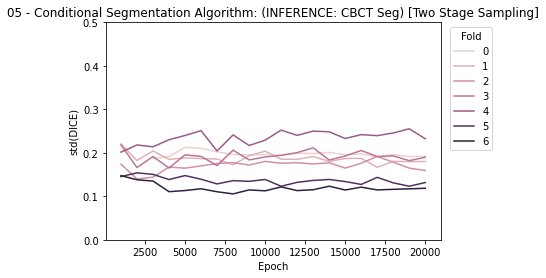

exp_type: CondisegReversed
exp_name_title_mapping[exp_type]: 06 - Conditional Segmentation (Reversed): (INFERENCE: CT Seg) [Two Stage Sampling]


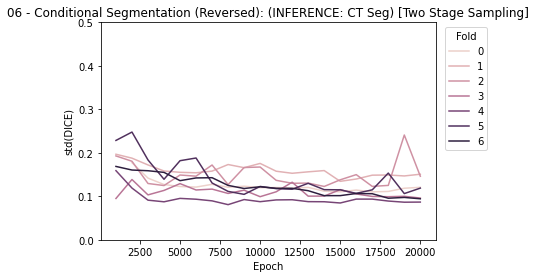

exp_type: segModeBoth
exp_name_title_mapping[exp_type]: 04 - CBCT and CT Segmentation: (INFERENCE: [CBCT,CT] Seg)


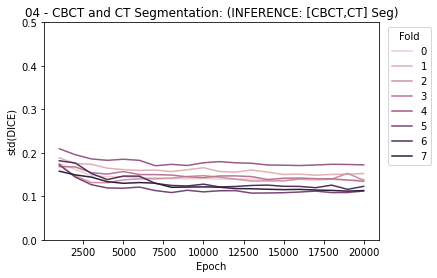

exp_type: segModeCBCT
exp_name_title_mapping[exp_type]: 01 - CBCT Segmentation: (TRAIN: CBCT; INFERENCE: CBCT Seg)


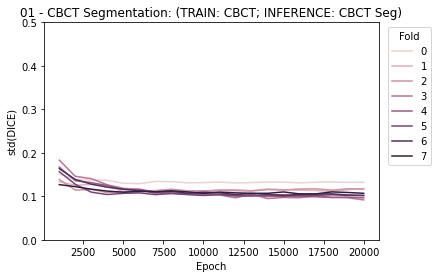

exp_type: segModeCT
exp_name_title_mapping[exp_type]: 02 - CBCT Segmentation: (TRAIN: CT; INFERENCE: CBCT Seg)


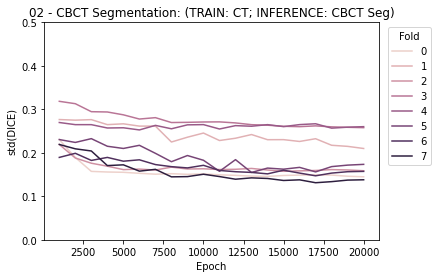

exp_type: segModeBoth_2sample
exp_name_title_mapping[exp_type]: x05 - CBCT and CT Segmentation: (INFERENCE: [CBCT,CT] Seg) [Two Stage Sampling]


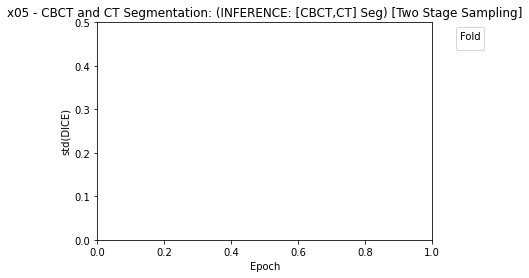

exp_type: inoutsegModeCT
exp_name_title_mapping[exp_type]: 03 - CT Segmentation (INPUT: CT; OUT: CT Seg)


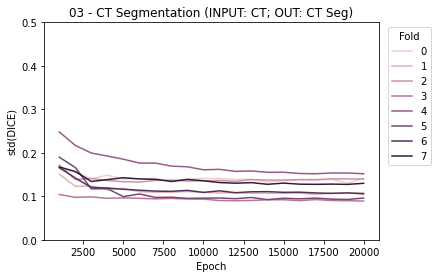

exp_type: CBCT_Infer_CondisegReversed
exp_name_title_mapping[exp_type]: 07 - Conditional Segmentation (Reversed): (INFERENCE: CBCT Seg) [Two Stage Sampling]


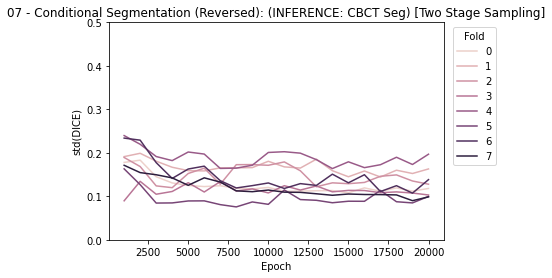

<Figure size 432x288 with 0 Axes>

In [35]:
train_val_test = "'val'"
value_type = "'dice_std'"
plot_data_by_folds(exp_types, train_val_test, value_type, 20000, 1000, y_label='std(DICE)')

In [36]:
t = df[(df['experiment_group'].str.startswith('06'))]
print(t.fold.unique())

[0 2 6 7 3 5 1]


In [37]:
exp_06 = df[(df['experiment_group'].str.startswith('06'))]
exp_06.head()

,project,exp_name,fold,train_val_test,epoch,value,value_type,experiment_group
891834,ConditionalSegReversed,CondisegReversed_cv0_nc16,0,'val',1880,0.694682,'dice_mean',06 - Conditional Segmentation (Reversed): (INF...
891835,ConditionalSegReversed,CondisegReversed_cv0_nc16,0,'val',1880,0.165893,'dice_std',06 - Conditional Segmentation (Reversed): (INF...
891836,ConditionalSegReversed,CondisegReversed_cv0_nc16,0,'train',1881,0.093280,'loss',06 - Conditional Segmentation (Reversed): (INF...
891837,ConditionalSegReversed,CondisegReversed_cv0_nc16,0,'val',1881,0.684008,'dice_mean',06 - Conditional Segmentation (Reversed): (INF...
891838,ConditionalSegReversed,CondisegReversed_cv0_nc16,0,'val',1881,0.157302,'dice_std',06 - Conditional Segmentation (Reversed): (INF...


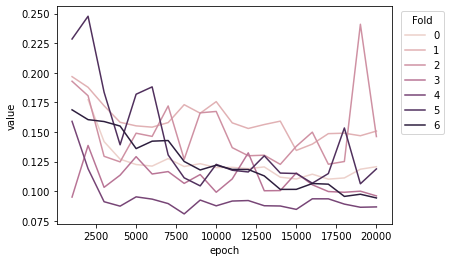

<Figure size 432x288 with 0 Axes>

In [38]:
#print(f'exp_name_title_mapping[exp_type]: {exp_name_title_mapping[exp_type]}') #for logging
exp_06 = exp_06[exp_06['epoch'] <= 20000] #Only get data for first 20k epochs
exp_06 = exp_06[exp_06['epoch'] % 1000 == 0] #Only get data for every 1000 epochs
#exp_06 = exp_06[exp_06['train_val_test'] == "'val'"] #only get training, validation, or test data
exp_06 = exp_06[exp_06['value_type'] == "'dice_std'"][['epoch', 'value', 'fold']] #only get loss data
plot = sns.lineplot(x='epoch', y='value', hue='fold', data=exp_06, ci = None, legend = 'full')
        
h,l = plot.get_legend_handles_labels()
labels=["0", "1", "2", "3", "4", "5", "6", "7"]
plot.legend(h, labels, title = "Fold", loc = "upper right", bbox_to_anchor=(1.17, 1)) 
plt.show()
plt.clf()


#### By Experiment

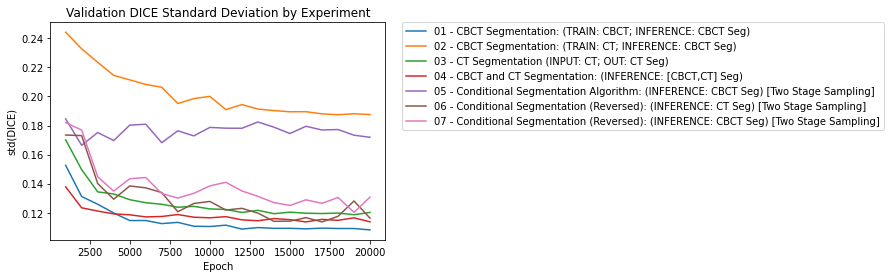

In [39]:
plot_data_aggregate(exp_types, "'val'", "'dice_std'", 20000, 1000, title='Validation DICE Standard Deviation by Experiment', y_label = 'std(DICE)')

### By Fold

In [40]:
import pickle as pkl

In [41]:
test_path = 'Experiments/exp_2_CS_and_CSRev/ConditionalSegReversed/CondisegReversed_cv0_nc16/results.pkl'

with open (test_path, 'rb') as f:
    results = pkl.load(f)

results


{'dice': [array(0.8794943, dtype=float32),
  array(0.6041194, dtype=float32),
  array(0.9488654, dtype=float32),
  array(0.86145145, dtype=float32),
  array(0.9355941, dtype=float32),
  array(0.44710892, dtype=float32),
  array(0.90577024, dtype=float32),
  array(0.78423125, dtype=float32),
  array(0.9367728, dtype=float32),
  array(0.7999395, dtype=float32),
  array(0.9217005, dtype=float32),
  array(0.74032646, dtype=float32)],
 'dice-wo-reg': [array(0.14902787, dtype=float32),
  array(0.07143804, dtype=float32),
  array(0.44811666, dtype=float32),
  array(0.34411386, dtype=float32),
  array(0.00348917, dtype=float32),
  array(0.04303997, dtype=float32),
  array(0.62144727, dtype=float32),
  array(0.456353, dtype=float32),
  array(0.24493645, dtype=float32),
  array(0.04058686, dtype=float32),
  array(0.90447843, dtype=float32),
  array(0.44524238, dtype=float32)]}

#### By Experiment

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


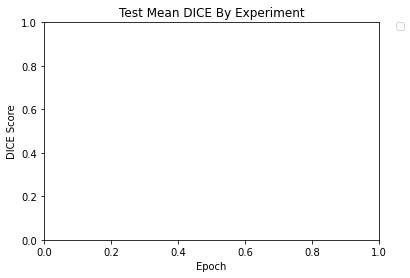

In [42]:
plot_data_aggregate(exp_types, "'test'", "'dice_mean'", 20000, 1000, title='Test Mean DICE By Experiment', y_label = 'DICE Score')

# Data Visualization

# Testing/Scratchpad
    

In [43]:
df[df['project'] == 'ConditionalSegReversed']

,project,exp_name,fold,train_val_test,epoch,value,value_type,experiment_group
891834,ConditionalSegReversed,CondisegReversed_cv0_nc16,0,'val',1880,0.694682,'dice_mean',06 - Conditional Segmentation (Reversed): (INF...
891835,ConditionalSegReversed,CondisegReversed_cv0_nc16,0,'val',1880,0.165893,'dice_std',06 - Conditional Segmentation (Reversed): (INF...
891836,ConditionalSegReversed,CondisegReversed_cv0_nc16,0,'train',1881,0.093280,'loss',06 - Conditional Segmentation (Reversed): (INF...
891837,ConditionalSegReversed,CondisegReversed_cv0_nc16,0,'val',1881,0.684008,'dice_mean',06 - Conditional Segmentation (Reversed): (INF...
891838,ConditionalSegReversed,CondisegReversed_cv0_nc16,0,'val',1881,0.157302,'dice_std',06 - Conditional Segmentation (Reversed): (INF...
...,...,...,...,...,...,...,...,...
1306191,ConditionalSegReversed,CondisegReversed_cv1_nc16,1,'val',19999,0.777189,'dice_mean',06 - Conditional Segmentation (Reversed): (INF...
1306192,ConditionalSegReversed,CondisegReversed_cv1_nc16,1,'val',19999,0.145258,'dice_std',06 - Conditional Segmentation (Reversed): (INF...
1306193,ConditionalSegReversed,CondisegReversed_cv1_nc16,1,'train',20000,0.043498,'loss',06 - Conditional Segmentation (Reversed): (INF...
1306194,ConditionalSegReversed,CondisegReversed_cv1_nc16,1,'val',20000,0.773943,'dice_mean',06 - Conditional Segmentation (Reversed): (INF...


In [44]:
df['experiment_group'] = df['exp_name'].map(exp_grouping)


In [45]:
df.experiment_group.unique()



array(['05 - Conditional Segmentation Algorithm: (INFERENCE: CBCT Seg) [Two Stage Sampling]',
       '06 - Conditional Segmentation (Reversed): (INFERENCE: CT Seg) [Two Stage Sampling]',
       '07 - Conditional Segmentation (Reversed): (INFERENCE: CBCT Seg) [Two Stage Sampling]',
       '03 - CT Segmentation (INPUT: CT; OUT: CT Seg)',
       '01 - CBCT Segmentation: (TRAIN: CBCT; INFERENCE: CBCT Seg)',
       '04 - CBCT and CT Segmentation: (INFERENCE: [CBCT,CT] Seg)',
       '02 - CBCT Segmentation: (TRAIN: CT; INFERENCE: CBCT Seg)'],
      dtype=object)

In [46]:
# #Creata a dictionary to map experiment name to a friendly name to be displayed on the chart for the corresponding experiment.
# exp_name_title_mapping = {'CondisegCBCT': "Conditional Segmentation Algorithm",
#                           'CondisegReversed': "Conditional Segmentation Algorithm (Reversed)",
#                           'segModeBoth': "CBCT & CT Segmentation",
#                           'segModeCBCT': "CBCT Segmentation",
#                           'segModeCT': "CT Segmentation"}

In [47]:
exp_grouping = {}
#Create a dictionary to map experiment name to a list of experiments that are part of the same group.
#Loop through all unique experiment names (one for each fold per experiment)
for exp_name in df.exp_name.unique().tolist():
    #Then loop through the exp_types which are unique exp_name prefixes. Map to the Grouping

    #print(f"exp_name: {exp_name}")
    for exp_type in exp_name_title_mapping.keys():
        #print(f'exp_type: {exp_type}')
        if exp_name.startswith(exp_type):
            exp_grouping[exp_name] = exp_name_title_mapping[exp_type]
            break #break out of the loop since we found the exp_type
#print(exp_grouping)

df['experiment_group'] = df['exp_name'].map(exp_grouping)

# Testing test data table with confidence intervals

In [48]:
import scipy.stats as st


In [49]:
test_df = pd.read_csv('./preprocessing/condi-seg/plot_data.csv')

def plot_test_data(exp_types, value_type, max_epochs, every_nth_epoch, title = None, y_label = 'Value'):
    

    print(test_df.describe())
    print(test_df.head())

    experiment_dataframes = {}
    #Loop through dataframe and get data for each experiment
    for method in ['01', '02', '03', '04', '05', '06', '07', '08']:
        experiment_dataframes[method] = test_df[test_df['method'] == method]
    
    



    # df_local = df[df['epoch'] % every_nth_epoch == 0] #Only get data for every 1000 epochs
    # print(df_local.experiment_group.unique())
    # if train_val_test == "'train'" and value_type == "'loss'":
    #     print('hit')
    #     print(df_local.describe())
    #     df_local = df_local.drop(df_local[df_local.experiment_group == '05 - CBCT and CT Segmentation: (INFERENCE: [CBCT,CT] Seg) [Two Stage Sampling]'].index)
    #     print(df_local.describe())
    
    # df_local = df_local[df_local['train_val_test'] == train_val_test] #only get training, validation, or test data
    # df_local = df_local[df_local['value_type'] == value_type] #only get loss, dice_mean, or dice_std data
    # df_local = df_local[df_local['epoch'] <= max_epochs] #Only get data for first 20k epochs
    # df_local = df_local.groupby(['experiment_group', 'epoch'], as_index=False).agg({"value": np.mean})
    


    # plot = sns.lineplot(x='epoch', y='value', hue='experiment_group', data=df_local, markers=True)

    # plot.set(title=title, xlabel='Epoch', ylabel=y_label) #Set title and labels
    # # Put the legend out of the figure
    # plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

    # plt.show()


#TEST
#plot_data_aggregate(exp_types,
plot_test_data(exp_types, "'loss'", 20000, 1000, title='Training Loss by Experiment', y_label = 'DICE Loss')

       Unnamed: 0        case        dice      method
count  744.000000  744.000000  744.000000  744.000000
mean   371.500000   29.016129    0.729407    4.306452
std    214.918589   21.242806    0.229804    2.291693
min      0.000000    0.000000    0.013425    1.000000
25%    185.750000   13.000000    0.679603    2.000000
50%    371.500000   26.000000    0.786472    4.000000
75%    557.250000   39.000000    0.887365    6.000000
max    743.000000   95.000000    0.968633    8.000000
   Unnamed: 0  case    organ      dice  method
0           0     0  Bladder  0.898248       4
1           1     1  Bladder  0.882014       4
2           2     2  Bladder  0.906400       4
3           3     3  Bladder  0.928256       4
4           4     4  Bladder  0.874506       4


In [66]:
test_df = pd.read_csv('./preprocessing/condi-seg/plot_data.csv')

#print(test_df.describe())
#rint(test_df.head())
confidence_interval_dataframe = pd.DataFrame()
experiment_dataframes = {} #to house the dataframes for each experiment
#final_test_df = pd.DataFrame()
#Loop through dataframe and get data for each experiment
for method in [1, 2, 3, 4, 5, 6, 7]:
    #Create a dataframe for each experiment.
    #print(f"Method: {method}")
    experiment_dataframes[method] = test_df[test_df['method'] == method]
    print(experiment_dataframes[method].head())

    #For Each Dataframe, get the 95% confidence interval for dice for bladder, rectum, and overall.
    for o in ['Bladder', 'Rectum', 'overall']:

        if o == 'overall':
            working_df = experiment_dataframes[method]
        else:
            working_df = experiment_dataframes[method][experiment_dataframes[method]["organ"] == o]

        #print(f"{o}_mean_dice: {experiment_dataframes[method].dice.mean()}")
        mean_dice = working_df.dice.mean()
        #print(f"{o}_dice_sem: {experiment_dataframes[method].dice.sem()}")
        dice_sem = working_df.dice.sem()
        #interval = st.t.interval(0.95, working_df.shape[0] - 1, loc=np.mean(working_df.dice), scale=st.sem(working_df.dice))
        interval = st.norm.interval(0.95, loc=np.mean(working_df.dice), scale=st.sem(working_df.dice))
        half_interval = (interval[1] - interval[0]) / 2
        #print(f"{o}_interval: {st.t.interval(0.95, experiment_dataframes[method].shape[0] - 1, loc=np.mean(experiment_dataframes[method]['dice']), scale=st.sem(experiment_dataframes[method]['dice']))}")
        #print(f"{o}_half_interval: {(interval[1] - interval[0]) / 2}")
        #print(experiment_dataframes[method][experiment_dataframes[method]['organ'] == 'bladder'].dice.mean())
        #print(experiment_dataframes[method][experiment_dataframes[method]['organ'] == 'bladder'].dice.std())
        formatted_ci = f"{mean_dice:.3f} \\textpm {half_interval:.3f}"

        confidence_interval_dataframe = confidence_interval_dataframe.append({'Experiment': method, 'organ': o, 'mean_dice': mean_dice, 'dice_sem': dice_sem, 'interval': interval, 'half_interval': half_interval, 'formatted_ci': formatted_ci}, ignore_index=True)


#print(confidence_interval_dataframe.head(100))

confidence_interval_dataframe.rename(columns={"Experiment":"Experiment ID", "organ": "Organ", "formatted_ci": "95% Dice Coefficient CI"}, inplace=True, errors = 'raise')	

#confidence_interval_dataframe[['Experiment ID', 'Organ', '95% Dice Coefficient CI']].to_latex('./preprocessing/condi-seg/latex_table.txt', index=False, header=False, escape=False)

print(confidence_interval_dataframe[['Experiment ID', 'Organ', '95% Dice Coefficient CI']].head(100))


     Unnamed: 0  case    organ      dice  method
192         192     0  Bladder  0.904878       1
193         193     1  Bladder  0.856554       1
194         194     2  Bladder  0.935202       1
195         195     3  Bladder  0.935358       1
196         196     4  Bladder  0.894750       1
     Unnamed: 0  case    organ      dice  method
288         288     0  Bladder  0.899945       2
289         289     1  Bladder  0.486721       2
290         290     2  Bladder  0.880732       2
291         291     3  Bladder  0.847161       2
292         292     4  Bladder  0.830731       2
     Unnamed: 0  case    organ      dice  method
552         552     0  Bladder  0.935066       3
553         553     1  Bladder  0.959646       3
554         554     2  Bladder  0.943817       3
555         555     3  Bladder  0.920502       3
556         556     4  Bladder  0.964434       3
   Unnamed: 0  case    organ      dice  method
0           0     0  Bladder  0.898248       4
1           1     1  Bla

/tmp/ipykernel_426/2026043727.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  confidence_interval_dataframe = confidence_interval_dataframe.append({'Experiment': method, 'organ': o, 'mean_dice': mean_dice, 'dice_sem': dice_sem, 'interval': interval, 'half_interval': half_interval, 'formatted_ci': formatted_ci}, ignore_index=True)
/tmp/ipykernel_426/2026043727.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  confidence_interval_dataframe = confidence_interval_dataframe.append({'Experiment': method, 'organ': o, 'mean_dice': mean_dice, 'dice_sem': dice_sem, 'interval': interval, 'half_interval': half_interval, 'formatted_ci': formatted_ci}, ignore_index=True)
/tmp/ipykernel_426/2026043727.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use p

# Loss @ Final Epoch with t test Confidence Intervals

In [51]:
loss_at_epoch_dataframe = df[(df['value_type'] == "'loss'") & (df['train_val_test'] == "'train'") & (df['epoch'] == 20000)]
#print(loss_at_epoch_dataframe.head(100))
test = loss_at_epoch_dataframe.groupby(['experiment_group', 'epoch'], as_index=False).agg({"value": np.mean})
#print(df[df['experiment_group'] == '05 - CBCT and CT Segmentation: (INFERENCE: [CBCT,CT] Seg) [Two Stage Sampling]'].head(100))
#todo: is this correct?
test['t_95_confidence_interval'] = test.apply(lambda row: st.t.interval(0.95, row['epoch'] - 1, loc=row['value'], scale=st.sem(loss_at_epoch_dataframe[loss_at_epoch_dataframe['experiment_group'] == row['experiment_group']]['value'])), axis=1)
test['half_interval'] = test.apply(lambda row: (row['t_95_confidence_interval'][1] - row['t_95_confidence_interval'][0]) / 2, axis=1)
test['formatted_ci'] = test.apply(lambda row: f"{row['value']:.3f} \\textpm {row['half_interval']:.3f}", axis=1)
test[['experiment_group', 'formatted_ci']].head(50)

loss_epoch_20000_final_df = test[['experiment_group', 'formatted_ci']]
loss_epoch_20000_final_df.rename(columns={'experiment_group': 'Experiment Name',
                   'formatted_ci': '95% DICE Coefficient Confidence Interval'}, inplace=True, errors = 'raise')

loss_epoch_20000_final_df.head(10)




/tmp/ipykernel_426/455115712.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  loss_epoch_20000_final_df.rename(columns={'experiment_group': 'Experiment Name',


,Experiment Name,95% DICE Coefficient Confidence Interval
0,01 - CBCT Segmentation: (TRAIN: CBCT; INFERENC...,0.169 \textpm 0.002
1,02 - CBCT Segmentation: (TRAIN: CT; INFERENCE:...,0.164 \textpm 0.004
2,03 - CT Segmentation (INPUT: CT; OUT: CT Seg),0.164 \textpm 0.004
3,04 - CBCT and CT Segmentation: (INFERENCE: [CB...,0.171 \textpm 0.002
4,05 - Conditional Segmentation Algorithm: (INFE...,0.051 \textpm 0.002
5,06 - Conditional Segmentation (Reversed): (INF...,0.045 \textpm 0.001
6,07 - Conditional Segmentation (Reversed): (INF...,0.046 \textpm 0.002


In [52]:
#Out to latex
print(loss_epoch_20000_final_df.to_latex(index=False, caption=("shortcaption" ,"Normal Confidence Intervals for Loss at Epoch 20000 for each Experiment"), label="tab:loss_at_epoch_20000", column_format="lrrr"))

\begin{table}
\centering
\caption[Normal Confidence Intervals for Loss at Epoch 20000 for each Experiment]{shortcaption}
\label{tab:loss_at_epoch_20000}
\begin{tabular}{lrrr}
\toprule
                                   Experiment Name & 95\% DICE Coefficient Confidence Interval \\
\midrule
01 - CBCT Segmentation: (TRAIN: CBCT; INFERENCE... &                      0.169 \textbackslash textpm 0.002 \\
02 - CBCT Segmentation: (TRAIN: CT; INFERENCE: ... &                      0.164 \textbackslash textpm 0.004 \\
     03 - CT Segmentation (INPUT: CT; OUT: CT Seg) &                      0.164 \textbackslash textpm 0.004 \\
04 - CBCT and CT Segmentation: (INFERENCE: [CBC... &                      0.171 \textbackslash textpm 0.002 \\
05 - Conditional Segmentation Algorithm: (INFER... &                      0.051 \textbackslash textpm 0.002 \\
06 - Conditional Segmentation (Reversed): (INFE... &                      0.045 \textbackslash textpm 0.001 \\
07 - Conditional Segmentation (Reversed): (

/tmp/ipykernel_426/970642483.py:2: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  print(loss_epoch_20000_final_df.to_latex(index=False, caption=("shortcaption" ,"Normal Confidence Intervals for Loss at Epoch 20000 for each Experiment"), label="tab:loss_at_epoch_20000", column_format="lrrr"))


# T Tests

In [ ]:
#Fix seed
np.random.seed(42)

In [88]:
test_df.head()

,Unnamed: 0,case,organ,dice,method
0,0,0,Bladder,0.898248,4
1,1,1,Bladder,0.882014,4
2,2,2,Bladder,0.906400,4
3,3,3,Bladder,0.928256,4
4,4,4,Bladder,0.874506,4


In [105]:
def t_test (df, method1, method2):
    #Join Bladder and Rectum by Case
    bladder_df = df[df['organ'] == 'Bladder']
    rectum_df = df[df['organ'] == 'Rectum']
    merged_df = pd.merge(bladder_df, rectum_df, on = ['case', 'method'], how = 'inner')


    #Get Average Dice
    merged_df['mean_overall_dice'] =  (merged_df.dice_x + merged_df.dice_y) / 2

    #Get dice means for each method
    method1_dice = merged_df[merged_df['method'] == method1]['mean_overall_dice'].to_numpy()
    method2_dice = merged_df[merged_df['method'] == method2]['mean_overall_dice'].to_numpy()


    #Get t-test
    t_test = st.ttest_ind(method1_dice, method2_dice, equal_var=False)


    print(t_test)

t_test(test_df, 1, 2)

#test_df[(test_df['case'] == 0) & (test_df['method'] == 4)]

Ttest_indResult(statistic=6.150841782494024, pvalue=8.827740831597803e-08)


## Experiment 01 vs 02

In [ ]:
t_test(test_df, 1, 2)


## Experiment 06 vs 03

In [106]:
t_test(test_df, 6, 3)


Ttest_indResult(statistic=-7.915499247971862, pvalue=3.376526216476019e-11)


## Experiment 05 vs 01

In [110]:
t_test(test_df, 5, 1)


Ttest_indResult(statistic=0.0, pvalue=1.0)


## Experiment 06 vs 05 (paired)

In [117]:
#Get measurements for each experiment
#Overall Dice Coefficent for each fold
def paired_t_test (df, method1, method2):
    #Join Bladder and Rectum by Case
    bladder_df = df[df['organ'] == 'Bladder']
    rectum_df = df[df['organ'] == 'Rectum']
    merged_df = pd.merge(bladder_df, rectum_df, on = ['case', 'method'], how = 'inner')


    #Get Average Dice
    merged_df['mean_overall_dice'] =  (merged_df.dice_x + merged_df.dice_y) / 2

    paired_df = pd.merge(merged_df[merged_df['method'] == method1], merged_df[merged_df['method'] == method2], on = ['case'], how = 'inner')

    print(paired_df.head())

    #Get t-test
    #t_test = st.ttest_ind(method1_dice, method2_dice, equal_var=False)
    paired_t_test = st.ttest_rel(paired_df['mean_overall_dice_x'], paired_df['mean_overall_dice_y'])


    #print(paired_t_test)

paired_t_test(test_df, 1, 2)

   Unnamed: 0_x_x  case organ_x_x  dice_x_x  method_x  Unnamed: 0_y_x  \
0             192     0   Bladder  0.904878         1             240   
1             193     1   Bladder  0.856554         1             241   
2             194     2   Bladder  0.935202         1             242   
3             195     3   Bladder  0.935358         1             243   
4             196     4   Bladder  0.894750         1             244   

  organ_y_x  dice_y_x  mean_overall_dice_x  Unnamed: 0_x_y organ_x_y  \
0    Rectum  0.694743             0.799810             288   Bladder   
1    Rectum  0.689382             0.772968             289   Bladder   
2    Rectum  0.663833             0.799518             290   Bladder   
3    Rectum  0.740793             0.838075             291   Bladder   
4    Rectum  0.798104             0.846427             292   Bladder   

   dice_x_y  method_y  Unnamed: 0_y_y organ_y_y  dice_y_y  mean_overall_dice_y  
0  0.899945         2             336    Rectum

## Experiment 07 vs 05 (paired)